# ![https://www.fiap.com.br/](https://img.shields.io/badge/FIAP-red.svg?longCache=true&style=for-the-badge) Programando IA com Python
#### Lennon V. Alves Dias . RM 334415

1. Leia o aquivo lemonades.csv usando pandas

In [63]:
import pandas as pd
lemonades = pd.read_csv('lemonades.csv', sep=';')
lemonades.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25


2. Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [64]:
lemonades.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354688
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


3. Realize a limpeza do dataset:
    1. verifique se existe valores nulos
    2. verifique e remova, se existir, linhas duplicadas
    3. trate os elementos faltantes (interpolação (data) e media)

In [65]:
print(lemonades.isnull().sum())
lemonades.drop_duplicates()
lemonades['Date'].fillna(method ='ffill', inplace = True)
lemonades['Location'].fillna(method ='ffill', inplace = True)
lemonades['Lemon'].fillna(lemonades['Lemon'].mean(), inplace = True)
lemonades['Orange'].fillna(lemonades['Orange'].mean(), inplace = True)
lemonades['Temperature'].fillna(lemonades['Temperature'].mean(), inplace = True)
lemonades['Leaflets'].fillna(lemonades['Leaflets'].mean(), inplace = True)
lemonades['Price'].fillna(lemonades['Price'].mean(), inplace = True)

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64


4. Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja


In [66]:
lemonades['Sales'] = lemonades['Lemon'] + lemonades['Orange']
lemonades.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,07/01/2016,Park,97,67,70,90.0,0.25,164
1,07/02/2016,Park,98,67,72,90.0,0.25,165
2,07/03/2016,Park,110,77,71,104.0,0.25,187


5. Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [67]:
lemonades['Revenue'] = lemonades['Price'] * lemonades['Sales']
lemonades.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,07/01/2016,Park,97,67,70,90.0,0.25,164,41.00
1,07/02/2016,Park,98,67,72,90.0,0.25,165,41.25
2,07/03/2016,Park,110,77,71,104.0,0.25,187,46.75


6. Escreva uma função que retorne o lucro total

In [68]:
def get_total(dataset, field):
    return f'Total: {dataset[field].sum()}'
get_total(lemonades, 'Revenue')

'Total: 2181.0'

7. Escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima.

In [69]:
def my_func(dataset, temp):
    return dataset['Temperature'].max() if temp == 1 else (int(dataset['Temperature'].mean()) if temp == 0 else (dataset['Temperature'].min() if temp == -1 else 'Invalid Temperature'))
temp_max = my_func(lemonades, 1)
temp_mean = my_func(lemonades, 0)
temp_min = my_func(lemonades, -1)
print(f'max: {temp_max}', f'mean: {temp_mean}', f'min: {temp_min}')

max: 84 mean: 78 min: 70


8. Escreva uma função que receba dois parâmetros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'.

In [70]:
def my_func(dataset, location):
    n_dataset = dataset
    if location == 'Park':
        n_dataset['Price'] = dataset['Price'] * 1.15
    elif location == 'Beach':
        n_dataset['Price'] = dataset['Price'] * 1.1
    return n_dataset
print(my_func(lemonades, 'Other').head(3))
print(my_func(lemonades, 'Beach').head(3))
print(my_func(lemonades, 'Park').head(3))

         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
0  07/01/2016     Park     97      67           70      90.0   0.25    164   
1  07/02/2016     Park     98      67           72      90.0   0.25    165   
2  07/03/2016     Park    110      77           71     104.0   0.25    187   

   Revenue  
0    41.00  
1    41.25  
2    46.75  
         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
0  07/01/2016     Park     97      67           70      90.0  0.275    164   
1  07/02/2016     Park     98      67           72      90.0  0.275    165   
2  07/03/2016     Park    110      77           71     104.0  0.275    187   

   Revenue  
0    41.00  
1    41.25  
2    46.75  
         Date Location  Lemon  Orange  Temperature  Leaflets    Price  Sales  \
0  07/01/2016     Park     97      67           70      90.0  0.31625    164   
1  07/02/2016     Park     98      67           72      90.0  0.31625    165   
2  07/03/2016     Park    110 

9. Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank (descendente)

In [71]:
def create_rank(dataset):
    n_dataset = dataset
    n_dataset['Rank'] = n_dataset['Temperature'].rank(ascending=1)
    return n_dataset
print(create_rank(lemonades))

          Date Location  Lemon  Orange  Temperature    Leaflets    Price  \
0   07/01/2016     Park     97      67           70   90.000000  0.31625   
1   07/02/2016     Park     98      67           72   90.000000  0.31625   
2   07/03/2016     Park    110      77           71  104.000000  0.31625   
3   07/04/2016    Beach    134      99           76   98.000000  0.31625   
4   07/05/2016    Beach    159     118           78  135.000000  0.31625   
5   07/06/2016    Beach    103      69           82   90.000000  0.31625   
6   07/06/2016    Beach    103      69           82   90.000000  0.31625   
7   07/07/2016    Beach    143     101           81  135.000000  0.31625   
8   07/07/2016    Beach    123      86           82  113.000000  0.31625   
9   07/09/2016    Beach    134      95           80  126.000000  0.31625   
10  07/10/2016    Beach    140      98           82  131.000000  0.31625   
11  07/11/2016    Beach    162     120           83  135.000000  0.31625   
12  07/12/20

10. Imprima um gráfico de linha que retorne o lucro ao longo do tempo

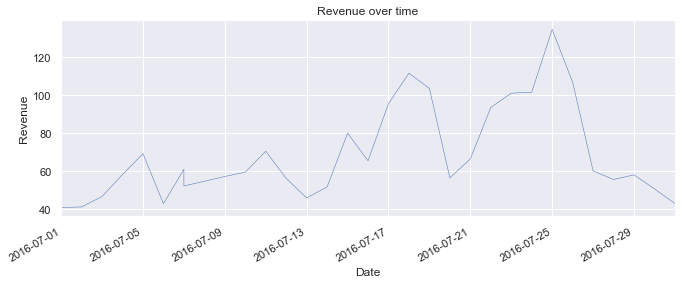

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

if 'Date' in lemonades:
    lemonades['Date'] = pd.to_datetime(lemonades['Date'])
    lemonades = lemonades.set_index('Date')
lemonade_plot = lemonades['Revenue'].plot(linewidth=0.5);

lemonade_plot.set_ylabel('Revenue')
lemonade_plot.set_title('Revenue over time');

11. Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? (Use a correlação de Pearson e explique o significado do valor obtido por ela)

12. Crie um histograma com 10 bins que mostre o lucro (revenue).

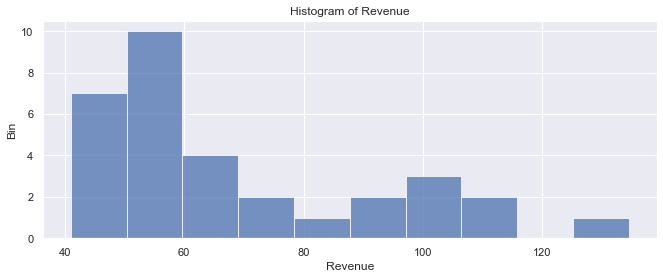

In [79]:
plt.hist(lemonades['Revenue'], bins=10, alpha=0.75)
plt.xlabel('Revenue')
plt.ylabel('Bin')
plt.title(f'Histogram of Revenue')
plt.show()

13. Crie um gráfico de linha que mostre o lucro (Revenue) por tipo de fruta ao longo do tempo.

Text(0.5, 1.0, 'Fruits over time')

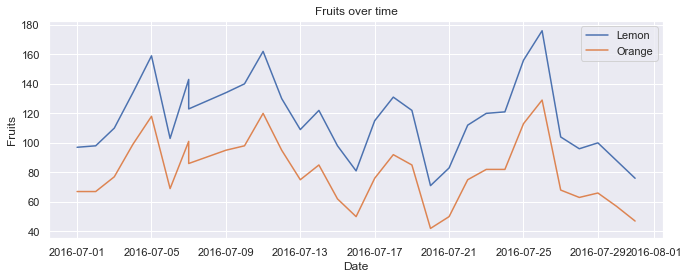

In [83]:
#lemonades.head(5)
fig, ax = plt.subplots()
for fruit in ['Lemon', 'Orange']:
    ax.plot(lemonades[fruit], label=fruit)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Fruits')
ax.set_title('Fruits over time')

14. Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:
    1. Temperature
    2. Leaflets
    3. Price
    4. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas.

15. Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido.

16. Generalize o algoritmo de Regressão Linear implementada em sala para que ele possa ser usado para regressão multivariada.

17. Aplique o algoritmo implementado na questão 16 no conjunto de dados consumo_cerveja.csv usando as mesmas features para treinamento.
    1. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning.
    2. Prediga o consumo usando seu modelo e o modelo da sklearn.
    3. Calcule o MSE de ambos